In [1]:
import numpy as np
import pandas as pd

feature=pd.read_csv('./featurs.csv',sep=';',)
feature

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
0              2          0         1            1    0         1   
1              2          2         4            0    0         0   
2              0          3         1            0    0         1   
3              2          4         2            0    2         0   
4              2          0         2            0    0         2   
...          ...        ...       ...          ...  ...       ...   
4686           0          0         0            0    0         0   
4687           0          0         0            0    1         0   
4688           0          0         0            0    0         0   
4689           0          0         0            0    1         0   
4690           0          1         0            0    0         1   

      parking_space  CVS  cafe  school  bank  
0                 4    0     7       7     0  
1                 3    1     2       1     0  
2                24    0     3       2     0  
3                 0    0     6       0     0  
4                 3    1     2      18     1  
...             ...  ...   ...     ...   ...  
4686              1    0     0       0     0  
4687              1    0     2       0     0  
4688             46    0     3       0     0  
4689             50    2     2       0     0  
4690             94    2     1       1     0  

[4691 rows x 11 columns]

In [2]:
desc=feature.describe()
desc

chain_cafe    breakfast     beverage  supermarket          MRT  \
count  4691.000000  4691.000000  4691.000000  4691.000000  4691.000000   
mean      0.812407     0.811341     1.816457     0.493498     0.499041   
std       1.083991     1.280661     2.015768     0.854007     0.846760   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     1.000000     0.000000     0.000000   
75%       1.000000     1.000000     3.000000     1.000000     1.000000   
max       8.000000     7.000000    13.000000     8.000000     5.000000   

          bus_stop  parking_space          CVS         cafe       school  \
count  4691.000000    4691.000000  4691.000000  4691.000000  4691.000000   
mean      0.179279      23.121509     0.479855     3.487103     2.459177   
std       0.466403      32.824281     0.897621     2.614947     3.246942   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       1.000000     0.000000     2.000000     0.000000   
50%       0.000000      10.000000     0.000000     3.000000     1.000000   
75%       0.000000      32.000000     1.000000     5.000000     4.000000   
max       2.000000     262.000000     8.000000    18.000000    32.000000   

              bank  
count  4691.000000  
mean      0.070987  
std       0.270576  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       2.000000

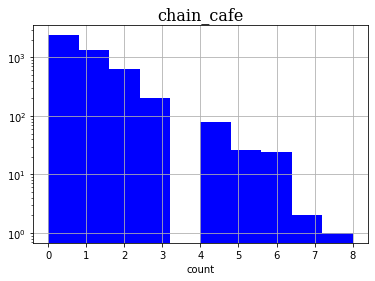

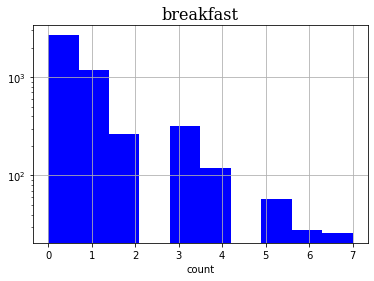

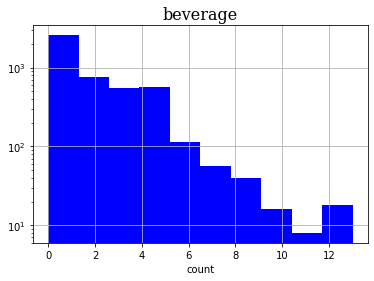

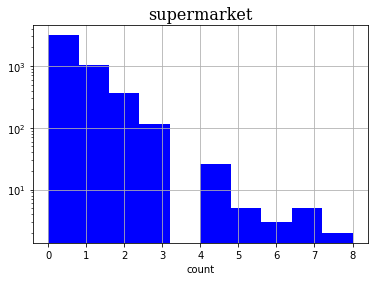

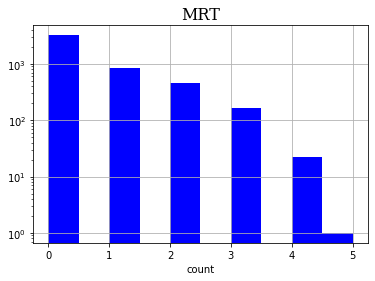

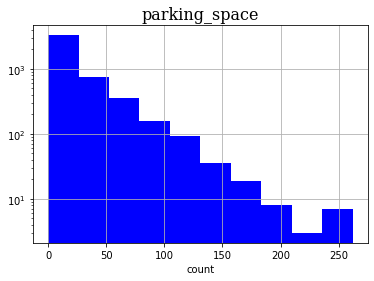

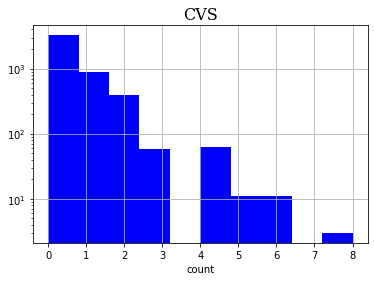

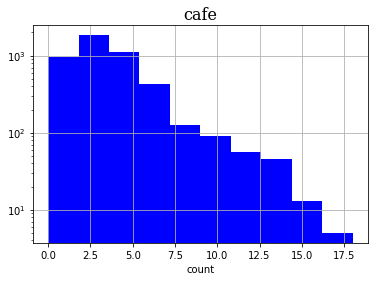

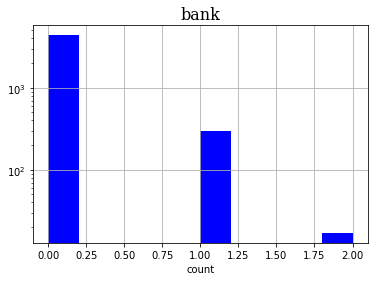

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
columns=feature.columns.tolist()
for i in columns:
    x = feature[i]

# the histogram of the data
    n, bins, patches = plt.hist(x, facecolor='b',log=True)

    plt.xlabel('count')
    
    font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }
    
    plt.title(f'{i}',fontdict=font)
    plt.grid(True)
    plt.show()

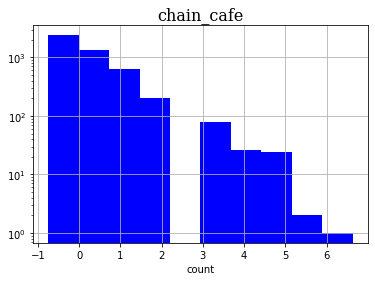

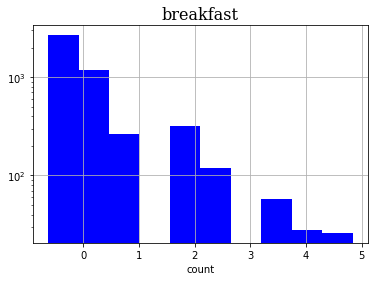

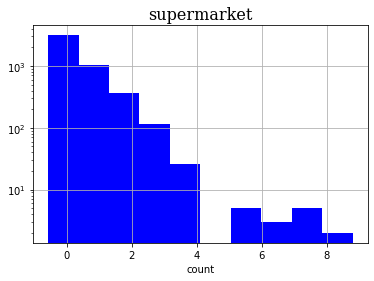

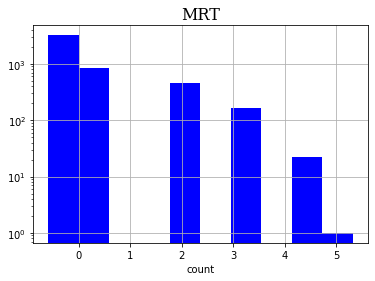

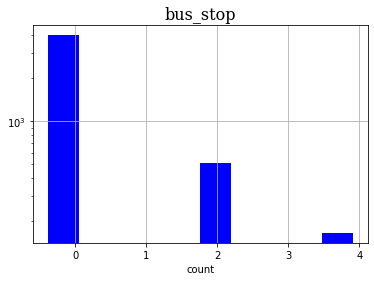

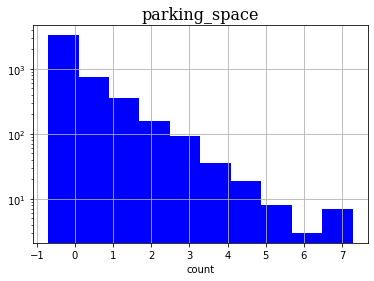

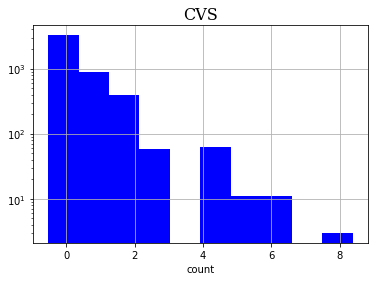

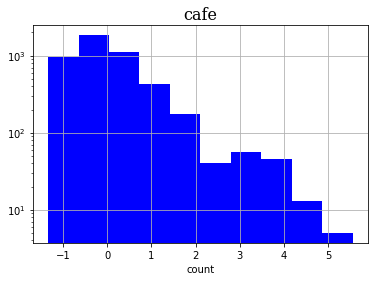

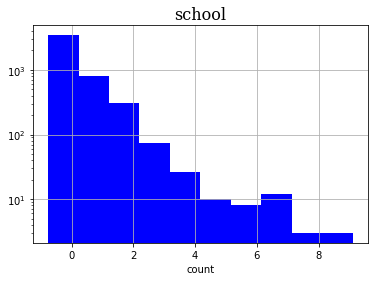

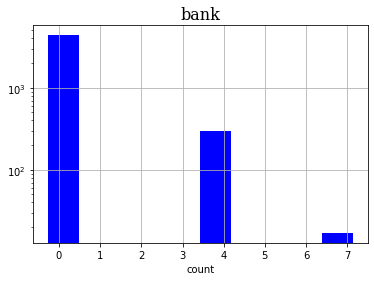

In [4]:
columns=feature.columns.tolist()
for i in columns:
    x = feature[i]
    mu = x.mean()
    std = x.std()

    z_score_normalized = (x - mu) / std

    n, bins, patches = plt.hist(z_score_normalized, facecolor='b',log=True)

    plt.xlabel('count')

    font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }

    plt.title(f'{i}',fontdict=font)
    plt.grid(True)
    plt.show()

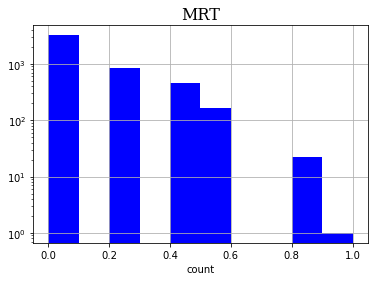

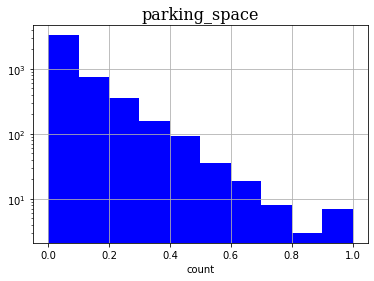

In [5]:
columns=feature.columns.tolist()
for i in columns:
    x = feature[i]

    MinMax_normalization= (x - x.min()) /(x.max() - x.min() )

    n, bins, patches = plt.hist(MinMax_normalization, facecolor='b',log=True)

    plt.xlabel('count')

    font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }

    plt.title(f'{i}',fontdict=font)
    plt.grid(True)
    plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np

scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=0.4, metric='cityblock', min_samples=30).fit(X)

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

scaler = StandardScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=0.1, min_samples=12).fit(X)

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()

feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == -1]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
0              2          0         1            1    0         1   
1              2          2         4            0    0         0   
2              0          3         1            0    0         1   
3              2          4         2            0    2         0   
4              2          0         2            0    0         2   
...          ...        ...       ...          ...  ...       ...   
4685           1          0         1            0    1         0   
4687           0          0         0            0    1         0   
4688           0          0         0            0    0         0   
4689           0          0         0            0    1         0   
4690           0          1         0            0    0         1   

      parking_space  CVS  cafe  school  bank  labels  
0                 4    0     7       7     0      -1  
1                 3    1     2       1     0      -1  
2                24    0     3       2     0      -1  
3                 0    0     6       0     0      -1  
4                 3    1     2      18     1      -1  
...             ...  ...   ...     ...   ...     ...  
4685             14    0     2       1     0      -1  
4687              1    0     2       0     0      -1  
4688             46    0     3       0     0      -1  
4689             50    2     2       0     0      -1  
4690             94    2     1       1     0      -1  

[4452 rows x 12 columns]

In [8]:
feature[feature['labels'] == 0]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
10             0          0         0            0    0         0   
39             0          0         0            0    0         0   
60             0          0         0            0    0         0   
98             0          0         0            0    0         0   
190            0          0         0            0    0         0   
318            0          0         0            0    0         0   
1121           0          0         0            0    0         0   
1513           0          0         0            0    0         0   
1582           0          0         0            0    0         0   
1843           0          0         0            0    0         0   
2168           0          0         0            0    0         0   
2686           0          0         0            0    0         0   

      parking_space  CVS  cafe  school  bank  labels  
10                2    0     2       1     0       0  
39                2    0     2       1     0       0  
60                2    0     2       1     0       0  
98                0    0     2       1     0       0  
190               0    0     2       1     0       0  
318               0    0     2       1     0       0  
1121              0    0     2       1     0       0  
1513              0    0     2       1     0       0  
1582              0    0     2       1     0       0  
1843              0    0     2       1     0       0  
2168              0    0     2       1     0       0  
2686              0    0     2       1     0       0

In [9]:
feature[feature['labels'] == 1]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
97             0          0         0            0    0         0   
338            0          0         0            0    0         0   
387            0          0         0            0    0         0   
470            0          0         0            0    0         0   
486            0          0         0            0    0         0   
527            0          0         0            0    0         0   
539            0          0         0            0    0         0   
653            0          0         0            0    0         0   
1089           0          0         0            0    0         0   
1339           0          0         0            0    0         0   
2036           0          0         0            0    0         0   
2149           0          0         0            0    0         0   
3323           0          0         0            0    0         0   
3369           0          0         0            0    0         0   
3764           0          0         0            0    0         0   
3889           0          0         0            0    0         0   
4298           0          0         0            0    0         0   
4365           0          0         0            0    0         0   
4384           0          0         0            0    0         0   
4403           0          0         0            0    0         0   
4501           0          0         0            0    0         0   

      parking_space  CVS  cafe  school  bank  labels  
97                0    0     2       0     0       1  
338               0    0     2       0     0       1  
387               0    0     2       0     0       1  
470               0    0     2       0     0       1  
486               0    0     2       0     0       1  
527               4    0     2       0     0       1  
539               0    0     2       0     0       1  
653               4    0     2       0     0       1  
1089              0    0     2       0     0       1  
1339              0    0     2       0     0       1  
2036              0    0     2       0     0       1  
2149              0    0     2       0     0       1  
3323              2    0     2       0     0       1  
3369              2    0     2       0     0       1  
3764              0    0     2       0     0       1  
3889              1    0     2       0     0       1  
4298              4    0     2       0     0       1  
4365              4    0     2       0     0       1  
4384              0    0     2       0     0       1  
4403              0    0     2       0     0       1  
4501              4    0     2       0     0       1

In [10]:
feature[feature['labels'] == 2]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
148            0          0         0            0    0         0   
172            0          0         0            0    0         0   
286            0          0         0            0    0         0   
713            0          0         0            0    0         0   
725            0          0         0            0    0         0   
...          ...        ...       ...          ...  ...       ...   
4657           0          0         0            0    0         0   
4658           0          0         0            0    0         0   
4659           0          0         0            0    0         0   
4660           0          0         0            0    0         0   
4686           0          0         0            0    0         0   

      parking_space  CVS  cafe  school  bank  labels  
148               0    0     0       0     0       2  
172               0    0     0       0     0       2  
286               0    0     0       0     0       2  
713               0    0     0       0     0       2  
725               0    0     0       0     0       2  
...             ...  ...   ...     ...   ...     ...  
4657             14    0     0       0     0       2  
4658              0    0     0       0     0       2  
4659              0    0     0       0     0       2  
4660              7    0     0       0     0       2  
4686              1    0     0       0     0       2  

[105 rows x 12 columns]

In [11]:
feature[feature['labels'] == 4]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
366            0          0         0            0    0         0   
405            0          0         0            0    0         0   
1017           0          0         0            0    0         0   
1029           0          0         0            0    0         0   
1110           0          0         0            0    0         0   
1115           0          0         0            0    0         0   
1308           0          0         0            0    0         0   
1517           0          0         0            0    0         0   
1919           0          0         0            0    0         0   
3117           0          0         0            0    0         0   
3258           0          0         0            0    0         0   
4012           0          0         0            0    0         0   

      parking_space  CVS  cafe  school  bank  labels  
366               0    0     3       1     0       4  
405               0    0     3       1     0       4  
1017              3    0     3       1     0       4  
1029              0    0     3       1     0       4  
1110              0    0     3       1     0       4  
1115              2    0     3       1     0       4  
1308              2    0     3       1     0       4  
1517              0    0     3       1     0       4  
1919              0    0     3       1     0       4  
3117              0    0     3       1     0       4  
3258              6    0     3       1     0       4  
4012              5    0     3       1     0       4

In [12]:
feature[feature['labels'] == 3]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
246            0          0         0            0    0         0   
275            0          0         0            0    0         0   
303            0          0         0            0    0         0   
462            0          0         0            0    0         0   
661            0          0         0            0    0         0   
...          ...        ...       ...          ...  ...       ...   
4564           0          0         0            0    0         0   
4571           0          0         0            0    0         0   
4615           0          0         0            0    0         0   
4646           0          0         0            0    0         0   
4684           0          0         0            0    0         0   

      parking_space  CVS  cafe  school  bank  labels  
246               7    0     1       0     0       3  
275               2    0     1       0     0       3  
303               2    0     1       0     0       3  
462               0    0     1       0     0       3  
661               2    0     1       0     0       3  
...             ...  ...   ...     ...   ...     ...  
4564             10    0     1       0     0       3  
4571             10    0     1       0     0       3  
4615             15    0     1       0     0       3  
4646              4    0     1       0     0       3  
4684              0    0     1       0     0       3  

[76 rows x 12 columns]

In [13]:
feature[feature['labels'] == 4]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
366            0          0         0            0    0         0   
405            0          0         0            0    0         0   
1017           0          0         0            0    0         0   
1029           0          0         0            0    0         0   
1110           0          0         0            0    0         0   
1115           0          0         0            0    0         0   
1308           0          0         0            0    0         0   
1517           0          0         0            0    0         0   
1919           0          0         0            0    0         0   
3117           0          0         0            0    0         0   
3258           0          0         0            0    0         0   
4012           0          0         0            0    0         0   

      parking_space  CVS  cafe  school  bank  labels  
366               0    0     3       1     0       4  
405               0    0     3       1     0       4  
1017              3    0     3       1     0       4  
1029              0    0     3       1     0       4  
1110              0    0     3       1     0       4  
1115              2    0     3       1     0       4  
1308              2    0     3       1     0       4  
1517              0    0     3       1     0       4  
1919              0    0     3       1     0       4  
3117              0    0     3       1     0       4  
3258              6    0     3       1     0       4  
4012              5    0     3       1     0       4

In [14]:
feature[feature['labels'] == 5]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
203            0          0         0            0    0         0   
347            0          0         0            0    0         0   
650            0          0         0            0    0         0   
1086           0          0         0            0    0         0   
1114           0          0         0            0    0         0   
1381           0          0         0            0    0         0   
1723           0          0         0            0    0         0   
1758           0          0         0            0    0         0   
1962           0          0         0            0    0         0   
3021           0          0         0            0    0         0   
3100           0          0         0            0    0         0   
3116           0          0         0            0    0         0   
3199           0          0         0            0    0         0   

      parking_space  CVS  cafe  school  bank  labels  
203              16    0     1       1     0       5  
347              16    0     1       1     0       5  
650              17    0     1       1     0       5  
1086             21    0     1       1     0       5  
1114             16    0     1       1     0       5  
1381             21    0     1       1     0       5  
1723             20    0     1       1     0       5  
1758             18    0     1       1     0       5  
1962             21    0     1       1     0       5  
3021             16    0     1       1     0       5  
3100             15    0     1       1     0       5  
3116             16    0     1       1     0       5  
3199             19    0     1       1     0       5

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

scaler = StandardScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=3, min_samples=10).fit(X)

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()

In [16]:
feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == -1]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
4              2          0         2            0    0         2   
8              2          0         2            0    0         2   
33             2          0         2            0    0         2   
37             2          0         2            0    0         2   
79             2          0         2            1    0         2   
89             2          0         3            1    0         2   
101            2          0         2            2    2         0   
104            6          0        12            7    0         2   
123            2          0         2            2    2         0   
158            6          0         7            7    0         2   
196            6          0         7            7    0         2   
227            6          0         7            7    0         2   
249            4          2         4            0    0         1   
289            2          0         3            2    0         2   
315            8          0        10            6    0         2   
373            2          0         2            1    0         2   
380            1          4         2            0    2         1   
412            2          0         2            1    0         2   
711            0          0         0            1    2         0   
874            2          0         2            1    0         2   
881            1          0         2            2    0         2   
953            1          0         2            2    0         2   
1069           1          0         2            2    0         2   
1302           3          0         2            2    2         0   
1329           2          0         3            1    0         2   
1396           2          0         2            2    2         0   
1412           2          0         2            2    2         0   
1527           7          0        13            4    0         2   
1628           6          0         6            8    0         2   
1649           3          0         3            0    0         2   
1872           6          0        11            5    0         2   
1989           6          0        12            6    0         2   
2090           4          0         4            7    0         2   
2102           3          0         3            0    0         2   
2183           6          0        12            5    0         2   
2198           2          0         3            1    0         2   
2201           2          0         2            2    2         0   
2209           1          0         4            0    2         2   
2210           6          0        12            3    0         2   
2250           2          0         2            1    0         2   
2399           4          2         4            0    0         1   
2409           0          0         0            1    0         2   
2552           6          0         6            8    0         2   
2716           6          0        12            6    0         2   
2947           1          7         3            2    1         0   
3025           1          1         6            2    2         0   
3167           1          1         6            2    1         0   
3401           1          0         6            2    1         0   
3404           1          0         6            2    1         0   
3787           0          7         2            2    1         0   
4028           0          6         3            1    1         0   
4376           2          3         2            1    0         1   
4383           1          0         6            2    1         0   

      parking_space  CVS  cafe  school  bank  labels  
4                 3    1     2      18     1      -1  
8                 3    0     2      13     1      -1  
33                3    1     2      18     1      -1  
37                3    0     2      13     1      -1  
79  

In [17]:
feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == 0]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
0              2          0         1            1    0         1   
1              2          2         4            0    0         0   
2              0          3         1            0    0         1   
3              2          4         2            0    2         0   
5              4          0         5            2    0         0   
...          ...        ...       ...          ...  ...       ...   
4686           0          0         0            0    0         0   
4687           0          0         0            0    1         0   
4688           0          0         0            0    0         0   
4689           0          0         0            0    1         0   
4690           0          1         0            0    0         1   

      parking_space  CVS  cafe  school  bank  labels  
0                 4    0     7       7     0       0  
1                 3    1     2       1     0       0  
2                24    0     3       2     0       0  
3                 0    0     6       0     0       0  
5                18    0     5       2     0       0  
...             ...  ...   ...     ...   ...     ...  
4686              1    0     0       0     0       0  
4687              1    0     2       0     0       0  
4688             46    0     3       0     0       0  
4689             50    2     2       0     0       0  
4690             94    2     1       1     0       0  

[4334 rows x 12 columns]

In [18]:
feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == 1]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
13             1          0         1            1    0         0   
42             1          0         1            1    0         0   
58             1          0         1            1    0         0   
88             1          0         2            1    0         0   
92             2          0         2            0    1         0   
...          ...        ...       ...          ...  ...       ...   
4590           0          1         0            0    0         0   
4604           0          0         1            0    1         0   
4656           0          1         0            1    0         0   
4679           2          0         5            0    0         0   
4681           0          0         0            0    1         0   

      parking_space  CVS  cafe  school  bank  labels  
13                4    1     3       5     1       1  
42                4    1     3       5     1       1  
58                4    1     3       5     1       1  
88                0    0     4       8     1       1  
92                4    0     5       4     1       1  
...             ...  ...   ...     ...   ...     ...  
4590              0    0     2       0     1       1  
4604             10    0     4       3     1       1  
4656             12    0     1       1     1       1  
4679             93    0     5       0     1       1  
4681              0    0     2       0     1       1  

[287 rows x 12 columns]

In [19]:
feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == 2]

chain_cafe  breakfast  beverage  supermarket  MRT  bus_stop  \
305            1          0         0            0    0         0   
381            1          0         0            0    0         0   
684            0          0         0            0    0         0   
742            0          0         0            0    0         0   
983            1          0         1            0    0         0   
1125           0          1         0            0    0         0   
1304           0          1         0            0    0         0   
1388           0          1         0            0    0         0   
1441           0          0         0            0    0         0   
1705           0          1         0            0    0         0   
2232           0          0         0            0    0         0   
2347           1          0         0            0    0         0   
2456           1          0         0            0    0         0   
2629           1          0         0            0    0         0   
2734           0          0         0            0    0         0   
4639           0          0         1            0    0         0   
4640           0          0         1            0    0         0   

      parking_space  CVS  cafe  school  bank  labels  
305               0    2     1       3     2       2  
381               0    0     3       1     2       2  
684               4    0     2       3     2       2  
742               0    0     1       0     2       2  
983               0    1     2       2     2       2  
1125              0    0     0       0     2       2  
1304              0    0     0       0     2       2  
1388              4    0     0       0     2       2  
1441              1    0     0       0     2       2  
1705              0    0     0       0     2       2  
2232              0    0     1       0     2       2  
2347              0    0     3       1     2       2  
2456              0    2     1       3     2       2  
2629              0    0     3       3     2       2  
2734              1    0     1       1     2       2  
4639             29    0     4       1     2       2  
4640             29    0     4       1     2       2

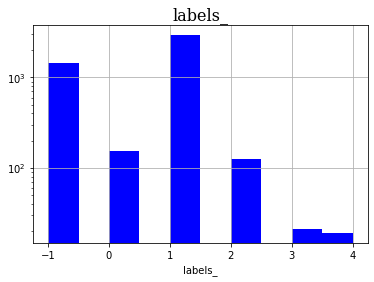

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

scaler = StandardScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=1.5, min_samples=19).fit(X)

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()

In [21]:
feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == -1]
p = feature[feature['labels'] == -1]
p.describe()

chain_cafe    breakfast     beverage  supermarket          MRT  \
count  1449.000000  1449.000000  1449.000000  1449.000000  1449.000000   
mean      1.485852     1.334023     3.347826     1.076605     0.705314   
std       1.368540     1.701951     2.410081     1.155845     1.020903   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     2.000000     0.000000     0.000000   
50%       1.000000     1.000000     3.000000     1.000000     0.000000   
75%       2.000000     2.000000     5.000000     2.000000     1.000000   
max       8.000000     7.000000    13.000000     8.000000     5.000000   

          bus_stop  parking_space          CVS         cafe       school  \
count  1449.000000    1449.000000  1449.000000  1449.000000  1449.000000   
mean      0.433402      35.452036     0.769496     5.017943     3.808144   
std       0.666805      44.631324     1.163740     3.221725     4.327627   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       2.000000     0.000000     3.000000     1.000000   
50%       0.000000      18.000000     0.000000     4.000000     3.000000   
75%       1.000000      55.000000     1.000000     7.000000     5.000000   
max       2.000000     262.000000     8.000000    18.000000    32.000000   

              bank  labels  
count  1449.000000  1449.0  
mean      0.143547    -1.0  
std       0.382762     0.0  
min       0.000000    -1.0  
25%       0.000000    -1.0  
50%       0.000000    -1.0  
75%       0.000000    -1.0  
max       2.000000    -1.0

In [22]:
feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == 0 ]
p2=feature[feature['labels'] == 0 ]
p2.describe()

chain_cafe   breakfast    beverage  supermarket         MRT  bus_stop  \
count  152.000000  152.000000  152.000000   152.000000  152.000000     152.0   
mean     0.927632    0.164474    1.177632     0.447368    0.046053       1.0   
std      0.798193    0.437393    1.023576     0.511969    0.210292       0.0   
min      0.000000    0.000000    0.000000     0.000000    0.000000       1.0   
25%      0.000000    0.000000    0.000000     0.000000    0.000000       1.0   
50%      1.000000    0.000000    1.000000     0.000000    0.000000       1.0   
75%      1.000000    0.000000    2.000000     1.000000    0.000000       1.0   
max      3.000000    2.000000    5.000000     2.000000    1.000000       1.0   

       parking_space         CVS        cafe      school   bank  labels  
count      152.00000  152.000000  152.000000  152.000000  152.0   152.0  
mean         8.62500    0.223684    4.789474    3.828947    0.0     0.0  
std         10.59227    0.418090    2.415819    2.536557    0.0     0.0  
min          0.00000    0.000000    0.000000    0.000000    0.0     0.0  
25%          1.00000    0.000000    3.000000    1.000000    0.0     0.0  
50%          4.00000    0.000000    5.000000    4.000000    0.0     0.0  
75%         12.00000    0.000000    7.000000    6.000000    0.0     0.0  
max         62.00000    1.000000   10.000000   11.000000    0.0     0.0

In [23]:
feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == 2 ]
p3=feature[feature['labels'] == 2 ]
p3.describe()

chain_cafe   breakfast    beverage  supermarket        MRT  bus_stop  \
count  125.000000  125.000000  125.000000   125.000000  125.00000     125.0   
mean     0.264000    0.408000    0.696000     0.136000    0.21600       0.0   
std      0.510281    0.596982    0.977357     0.366852    0.41317       0.0   
min      0.000000    0.000000    0.000000     0.000000    0.00000       0.0   
25%      0.000000    0.000000    0.000000     0.000000    0.00000       0.0   
50%      0.000000    0.000000    0.000000     0.000000    0.00000       0.0   
75%      0.000000    1.000000    1.000000     0.000000    0.00000       0.0   
max      2.000000    2.000000    4.000000     2.000000    1.00000       0.0   

       parking_space         CVS        cafe      school   bank  labels  
count     125.000000  125.000000  125.000000  125.000000  125.0   125.0  
mean       12.040000    0.200000    2.440000    1.768000    1.0     2.0  
std        16.968852    0.439941    1.410788    1.760389    0.0     0.0  
min         0.000000    0.000000    0.000000    0.000000    1.0     2.0  
25%         0.000000    0.000000    2.000000    0.000000    1.0     2.0  
50%         3.000000    0.000000    2.000000    1.000000    1.0     2.0  
75%        15.000000    0.000000    3.000000    3.000000    1.0     2.0  
max        65.000000    2.000000    6.000000    6.000000    1.0     2.0

In [24]:
feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == 3 ]
p4 = feature[feature['labels'] == 3 ]
p4.describe()

chain_cafe  breakfast   beverage  supermarket   MRT  bus_stop  \
count   21.000000       21.0  21.000000         21.0  21.0      21.0   
mean     1.952381        0.0   2.714286          0.0   1.0       2.0   
std      0.218218        0.0   1.007118          0.0   0.0       0.0   
min      1.000000        0.0   1.000000          0.0   1.0       2.0   
25%      2.000000        0.0   2.000000          0.0   1.0       2.0   
50%      2.000000        0.0   2.000000          0.0   1.0       2.0   
75%      2.000000        0.0   4.000000          0.0   1.0       2.0   
max      2.000000        0.0   4.000000          0.0   1.0       2.0   

       parking_space   CVS       cafe     school  bank  labels  
count      21.000000  21.0  21.000000  21.000000  21.0    21.0  
mean        0.761905   0.0   4.714286   5.476190   0.0     3.0  
std         1.480026   0.0   0.956183   1.030488   0.0     0.0  
min         0.000000   0.0   3.000000   3.000000   0.0     3.0  
25%         0.000000   0.0   4.000000   5.000000   0.0     3.0  
50%         0.000000   0.0   5.000000   5.000000   0.0     3.0  
75%         2.000000   0.0   5.000000   6.000000   0.0     3.0  
max         6.000000   0.0   6.000000   8.000000   0.0     3.0

In [25]:
feature['labels'] = list(clustering.labels_)
feature[feature['labels'] == 4 ]
p4 = feature[feature['labels'] == 4 ]
p4.describe()

chain_cafe  breakfast   beverage  supermarket   MRT  bus_stop  \
count   19.000000  19.000000  19.000000         19.0  19.0      19.0   
mean     0.263158   0.105263   0.263158          0.0   0.0       1.0   
std      0.452414   0.315302   0.452414          0.0   0.0       0.0   
min      0.000000   0.000000   0.000000          0.0   0.0       1.0   
25%      0.000000   0.000000   0.000000          0.0   0.0       1.0   
50%      0.000000   0.000000   0.000000          0.0   0.0       1.0   
75%      0.500000   0.000000   0.500000          0.0   0.0       1.0   
max      1.000000   1.000000   1.000000          0.0   0.0       1.0   

       parking_space        CVS       cafe     school  bank  labels  
count      19.000000  19.000000  19.000000  19.000000  19.0    19.0  
mean      111.421053   1.736842   2.105263   1.210526   0.0     4.0  
std        14.709467   0.452414   1.594948   1.134262   0.0     0.0  
min        82.000000   1.000000   0.000000   0.000000   0.0     4.0  
25%       102.000000   1.500000   1.000000   1.000000   0.0     4.0  
50%       108.000000   2.000000   2.000000   1.000000   0.0     4.0  
75%       120.000000   2.000000   4.000000   1.500000   0.0     4.0  
max       144.000000   2.000000   4.000000   5.000000   0.0     4.0